<a href="https://colab.research.google.com/github/diptoromeo/LangChain-based-LLM-for-ChatGPT/blob/main/05_LangChain_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install openai
!pip install langchain
!pip install langchain_community langchain_core
!pip install tiktoken
!pip install pypdf

In [11]:
# Azure API Licence call for OpenAi embedding
import os

os.environ['OPENAI_API_KEY'] = '34fcaca1b0b04ebc935168215a7b44e8'
os.environ['OPENAI_API_TYPE'] = 'azure'
os.environ['AZURE_OPENAI_ENDPOINT'] = 'https://labuser01openai.openai.azure.com/'
os.environ['OPENAI_API_VERSION'] = '2023-05-15'

In [10]:
from langchain.embeddings import AzureOpenAIEmbeddings

embedding_model = AzureOpenAIEmbeddings(
    deployment_name='dev-text-embedding-ada-002'
)

KeyError: 'openai_api_key'

# HuggingFace Embedding

In [12]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [13]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = 'BAAI/bge-small-en'
model_kwarge = {'device':'cpu'}
encode_kwarge = {'normalize_embeddings':True}

hf = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwarge,
    encode_kwargs=encode_kwarge
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
# 임베딩 안 내용을 임베딩으로 값으로 바꾼다.
embedding = hf.embed_documents(
    [
        'today is monday',
        'weather is nice day',
        'langchain is useful',
        'HelloWorld!',
        'my name is dipto'
    ]
)

In [17]:
len(embedding[0])

384

In [18]:
BGE_query_q = hf.embed_query('Hello, who is this')
BGE_query_a = hf.embed_query('Hi, this is adalen')

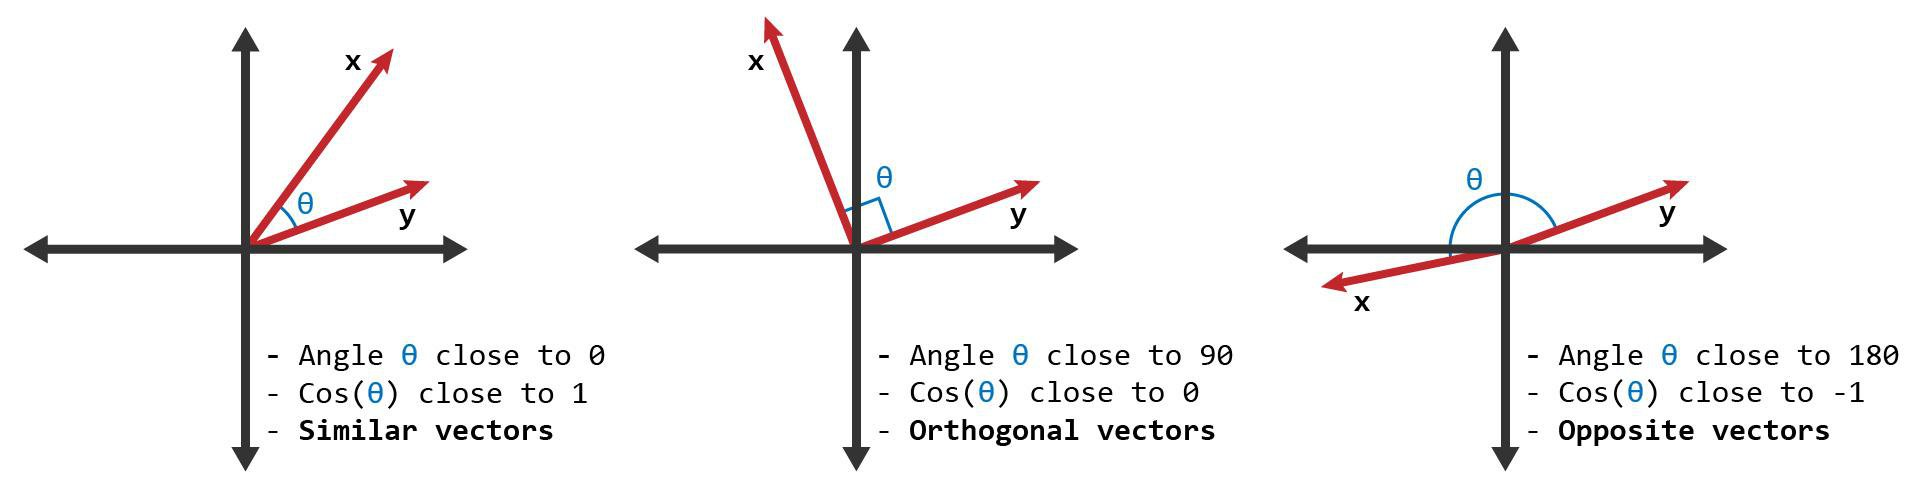

In [19]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [21]:
print(cos_sim(BGE_query_q, BGE_query_a))
print(cos_sim(BGE_query_q, embedding[1]))
print(cos_sim(BGE_query_q, embedding[4]))

0.8984699163490328
0.8299730889643965
0.8765992785636051


In [30]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = 'jhgan/ko-sbert-nli'
model_kwarge = {'device':'cpu'}
encode_kwarge = {'normalize_embeddings':True}

ko = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwarge,
    encode_kwargs=encode_kwarge
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [31]:
q = '홍길동 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까?'
a = '홍길동 아버지는 엄했습니다.'

ko_query_q = ko.embed_query(q)
ko_query_a = ko.embed_query(a)

In [24]:
len(ko_query_q)

768

In [32]:
print(cos_sim(ko_query_q, ko_query_a))

0.5076704697768064
